In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\Users\sanja\OneDrive\Desktop\ENI\year4sem1\Time Series and forecasting\archive\consumer_confidence_index_cci.csv'
cci_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
cci_data.head()

,Location,Indicator,Subject,Measure,Frequency,Time,Value,Flag Codes
0,FRA,CCI,AMPLITUD,LTRENDIDX,M,2017-01,100.2096,NaN
1,FRA,CCI,AMPLITUD,LTRENDIDX,M,2017-02,100.1315,NaN
2,FRA,CCI,AMPLITUD,LTRENDIDX,M,2017-03,100.1785,NaN
3,FRA,CCI,AMPLITUD,LTRENDIDX,M,2017-04,100.4184,NaN
4,FRA,CCI,AMPLITUD,LTRENDIDX,M,2017-05,100.8220,NaN


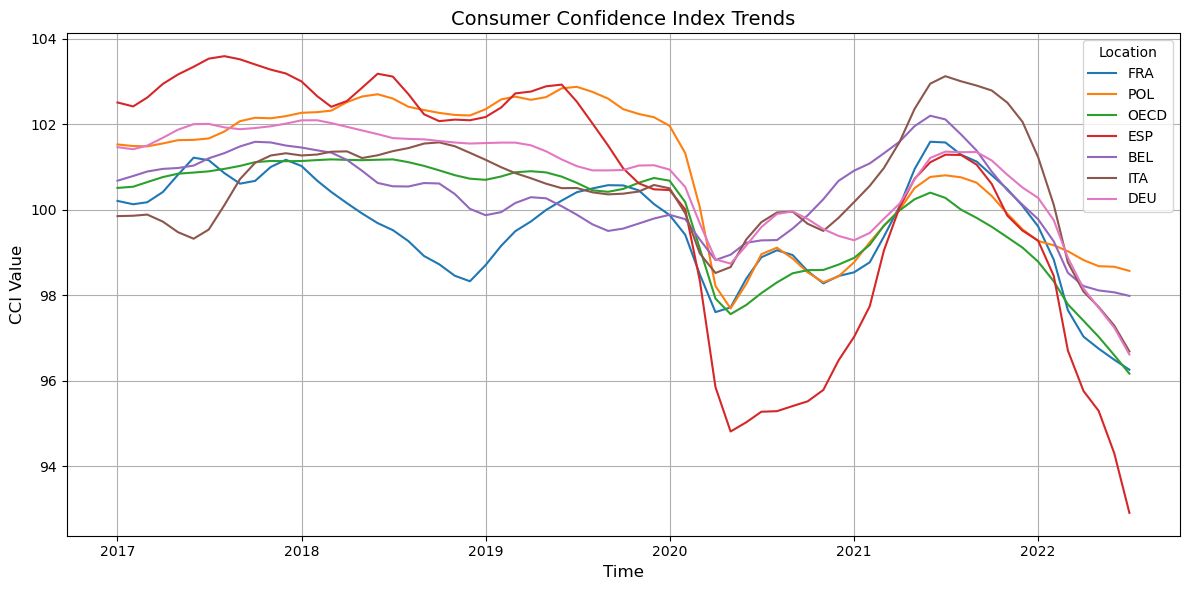

In [23]:
# Convert the 'Time' column to datetime for better plotting
cci_data['Time'] = pd.to_datetime(cci_data['Time'])

# Plotting the trend of CCI over time
plt.figure(figsize=(12, 6))
for location in cci_data['Location'].unique():
    location_data = cci_data[cci_data['Location'] == location]
    plt.plot(location_data['Time'], location_data['Value'], label=location)

# Adding title and labels
plt.title("Consumer Confidence Index Trends", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("CCI Value", fontsize=12)
plt.legend(title="Location")
plt.grid()
plt.tight_layout()
plt.show()

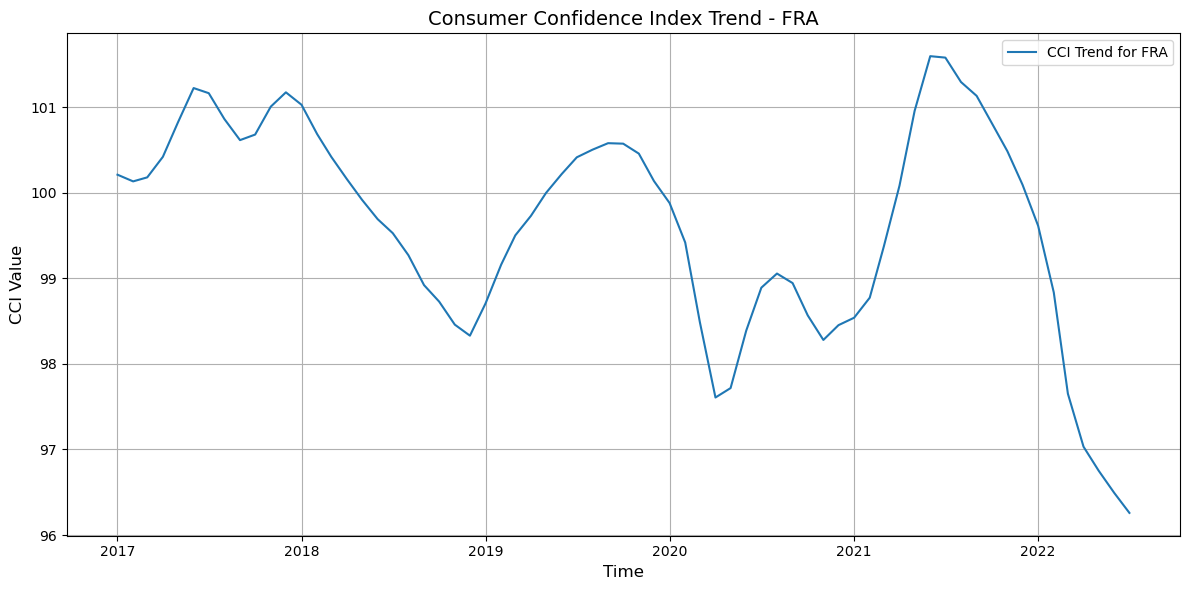

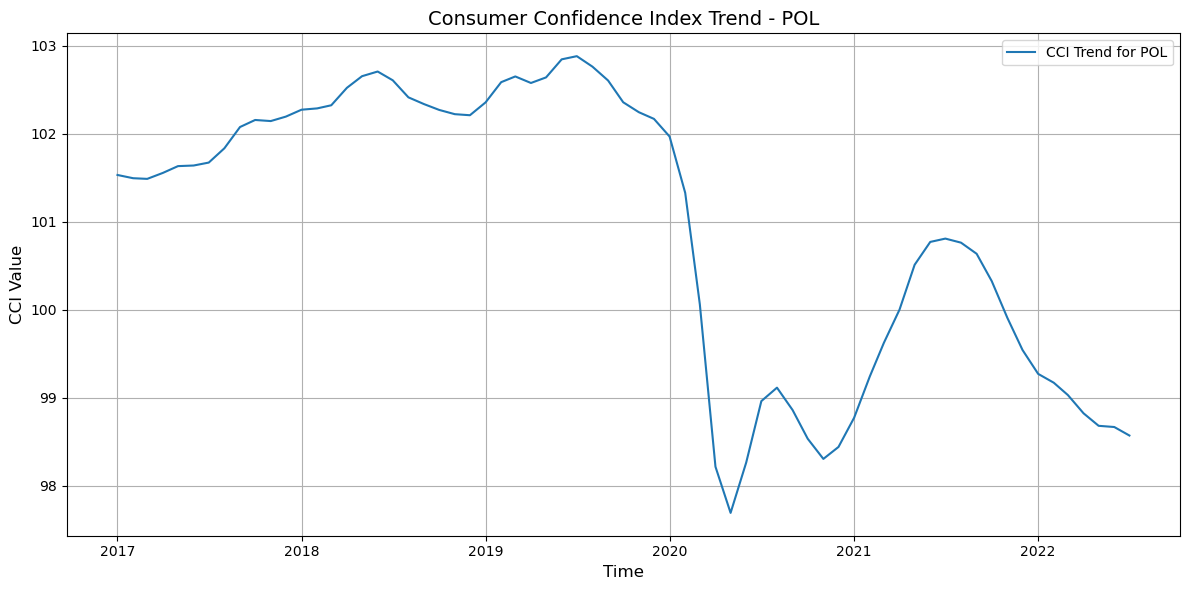

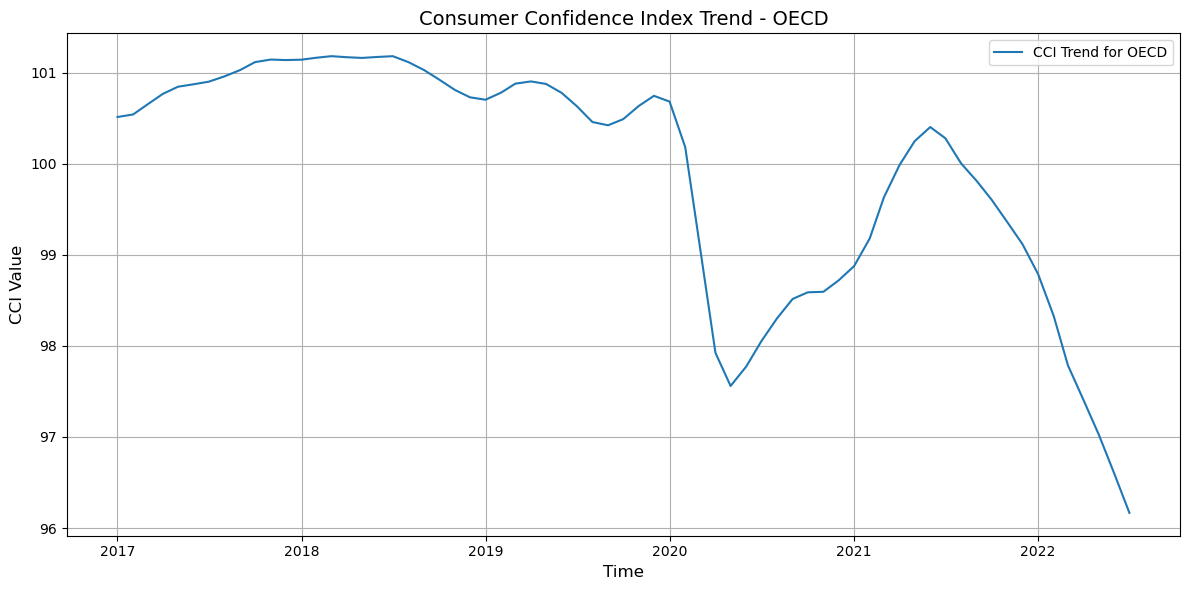

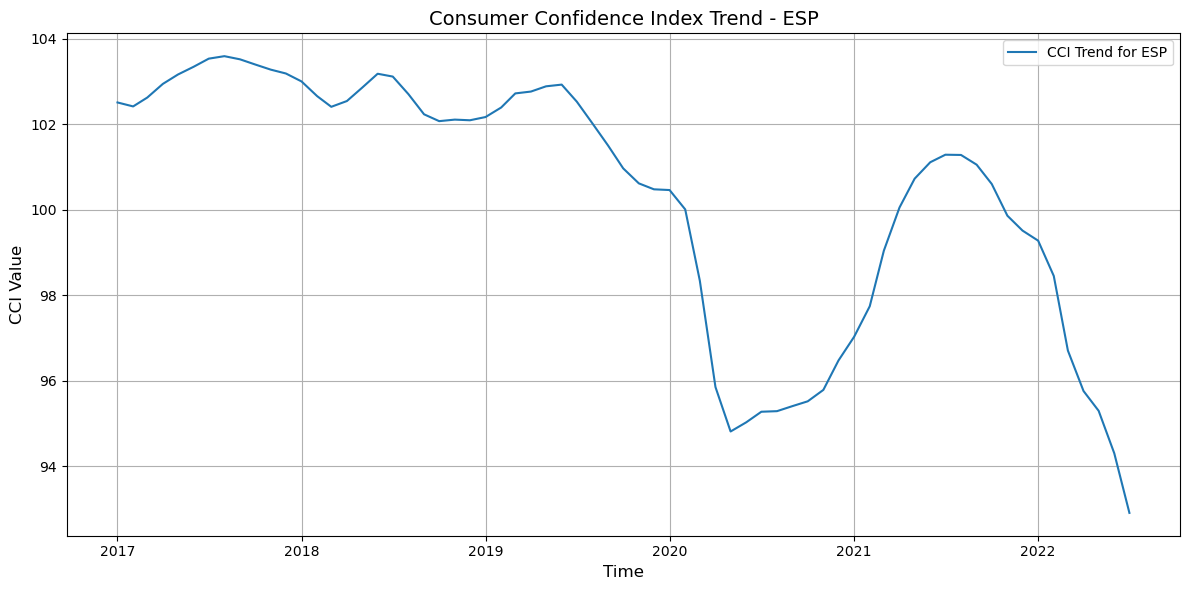

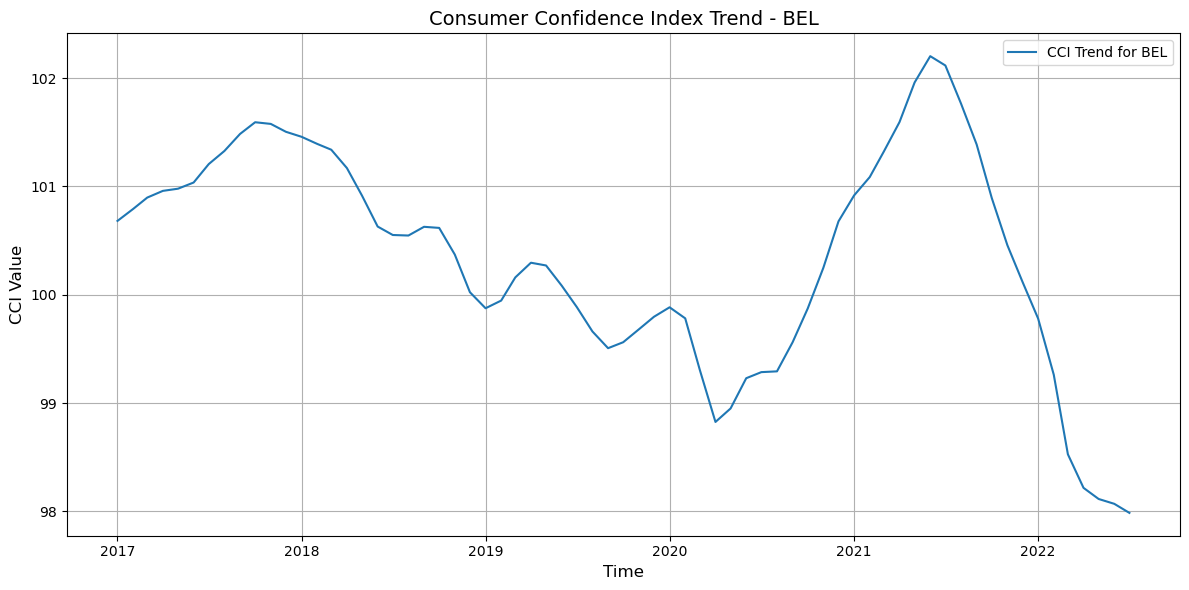

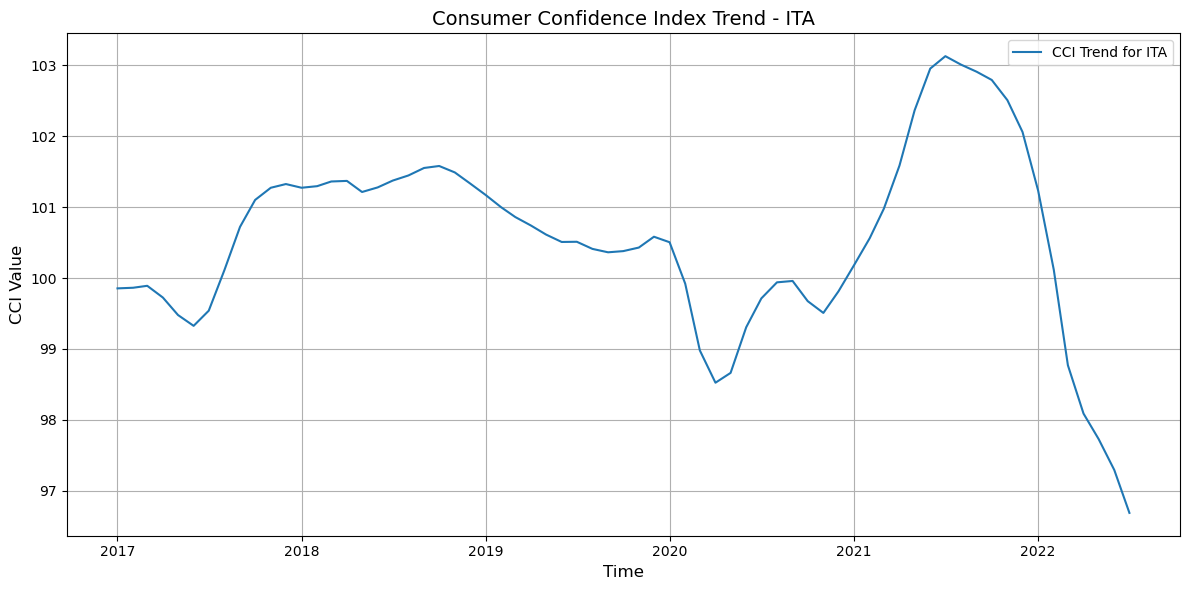

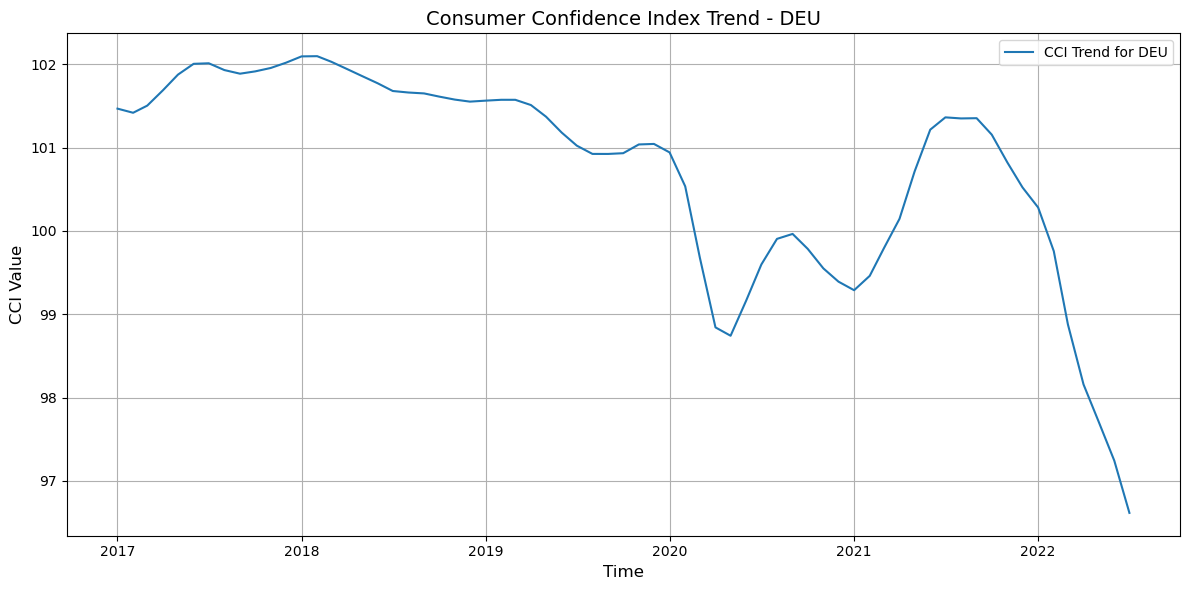

In [24]:
# Creating separate plots for each location
unique_locations = cci_data['Location'].unique()

for location in unique_locations:
    location_data = cci_data[cci_data['Location'] == location]
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(location_data['Time'], location_data['Value'], label=f"CCI Trend for {location}")
    plt.title(f"Consumer Confidence Index Trend - {location}", fontsize=14)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("CCI Value", fontsize=12)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

In [27]:
!pip install ace_tools


<Figure size 1200x800 with 0 Axes>

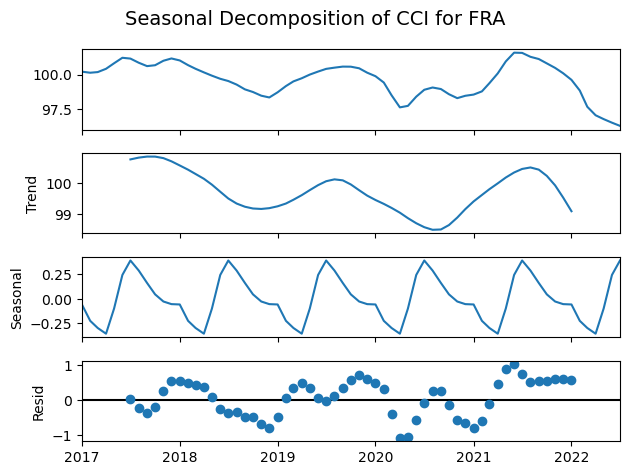

C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\AppData\Local\Temp\ipykernel_30396\1135857904.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Forecast'

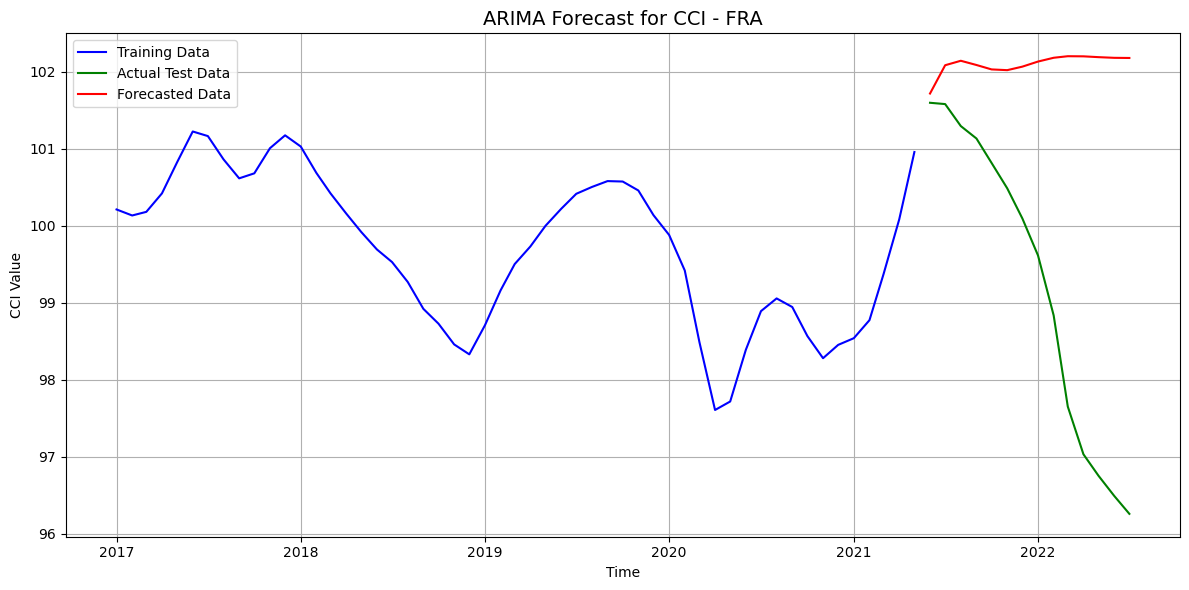

3.498361052220481

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Ensure data is sorted by time for each location
cci_data = cci_data.sort_values(by=['Location', 'Time'])

# Select a single location for the detailed analysis (we'll start with FRA as an example)
location = 'FRA'
location_data = cci_data[cci_data['Location'] == location][['Time', 'Value']]
location_data.set_index('Time', inplace=True)

# Perform seasonal decomposition to analyze trend, seasonality, and residuals
decomposition = seasonal_decompose(location_data, model='additive', period=12)

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle(f"Seasonal Decomposition of CCI for {location}", fontsize=14)
plt.tight_layout()
plt.show()

# Forecasting with ARIMA
# Splitting into train and test set
train_size = int(len(location_data) * 0.8)
train, test = location_data[:train_size], location_data[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # ARIMA(p,d,q) - example parameters
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))
test['Forecast'] = forecast

# Plot the observed vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Value'], label='Training Data', color='blue')
plt.plot(test.index, test['Value'], label='Actual Test Data', color='green')
plt.plot(test.index, test['Forecast'], label='Forecasted Data', color='red')
plt.title(f"ARIMA Forecast for CCI - {location}", fontsize=14)
plt.xlabel("Time")
plt.ylabel("CCI Value")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Calculate RMSE for the model
rmse = np.sqrt(mean_squared_error(test['Value'], test['Forecast']))
rmse

<Figure size 1200x800 with 0 Axes>

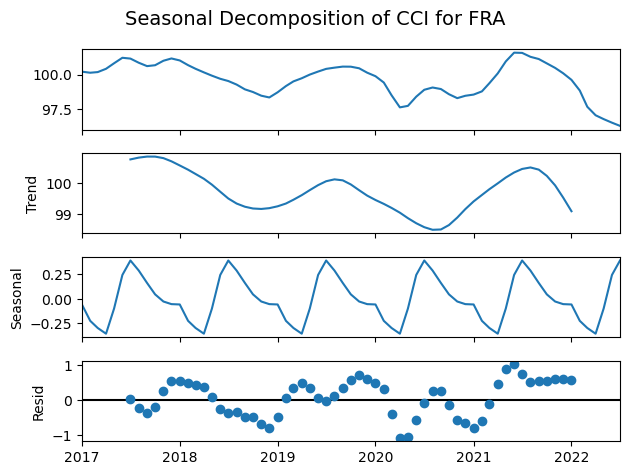

C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\AppData\Local\Temp\ipykernel_30396\3954689536.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Forecast'

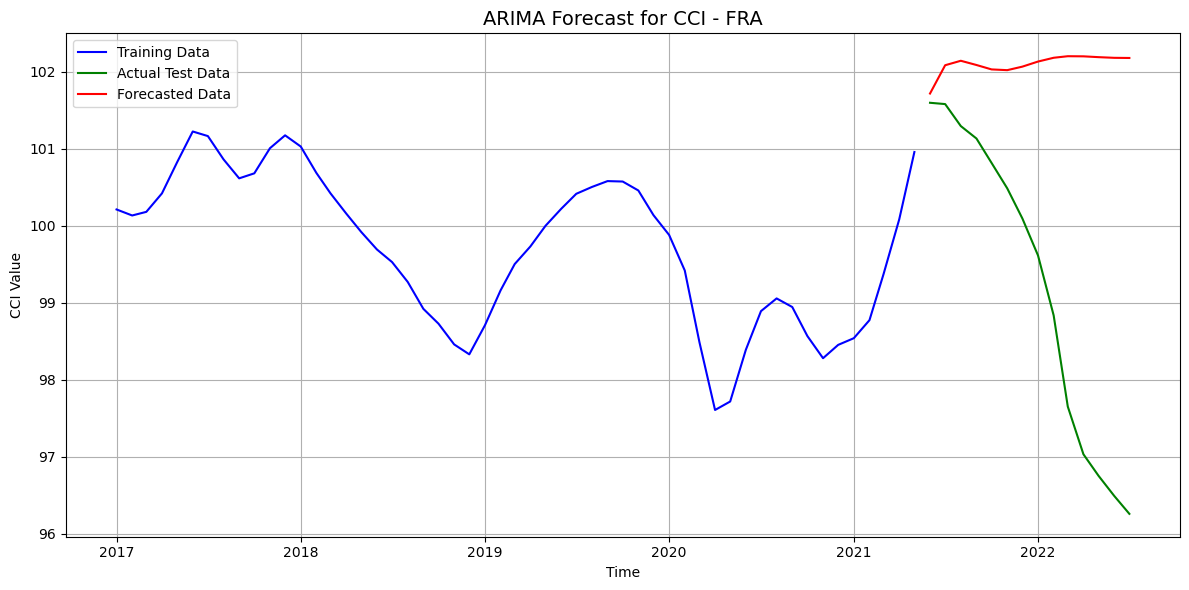

<Figure size 1200x800 with 0 Axes>

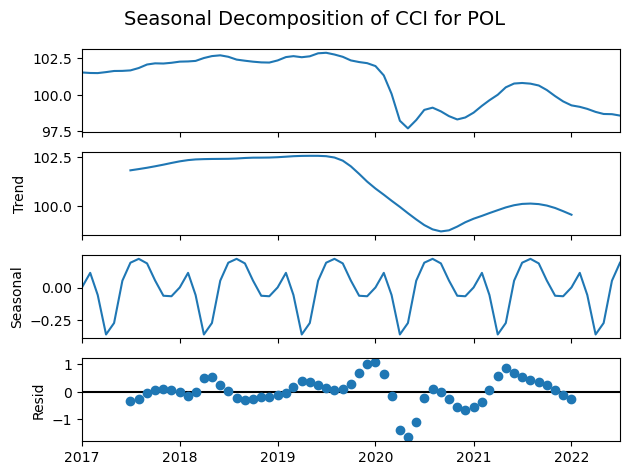

C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\AppData\Local\Temp\ipykernel_30396\3954689536.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Forecast'

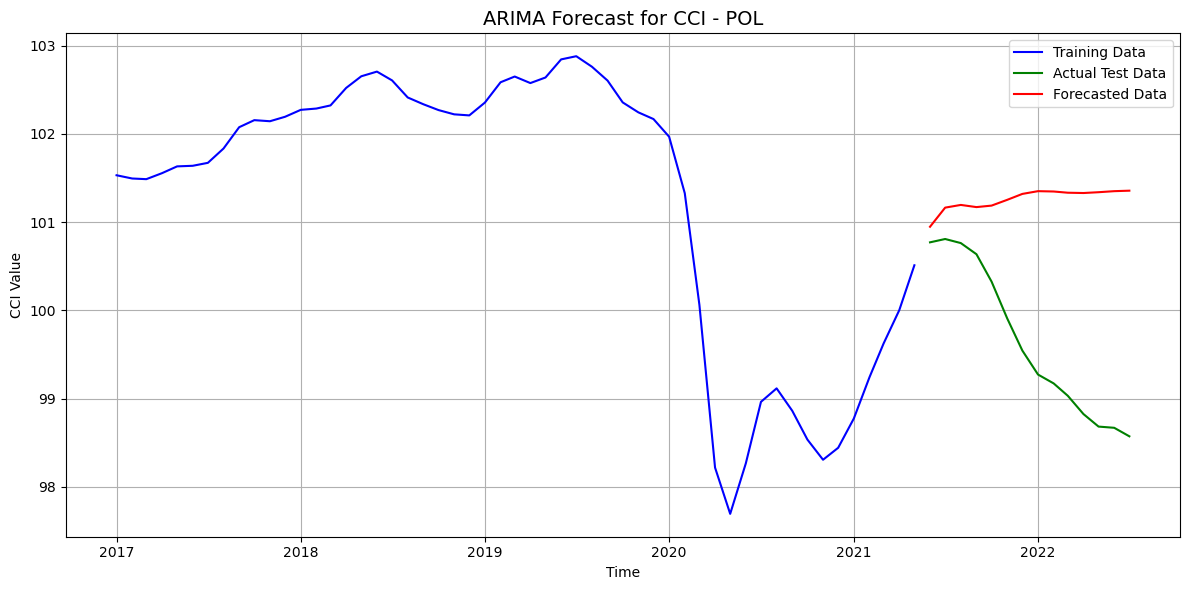

<Figure size 1200x800 with 0 Axes>

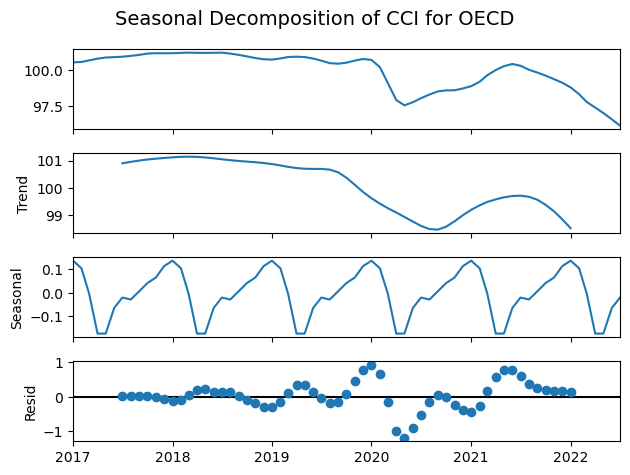

C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\AppData\Local\Temp\ipykernel_30396\3954689536.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Forecast'

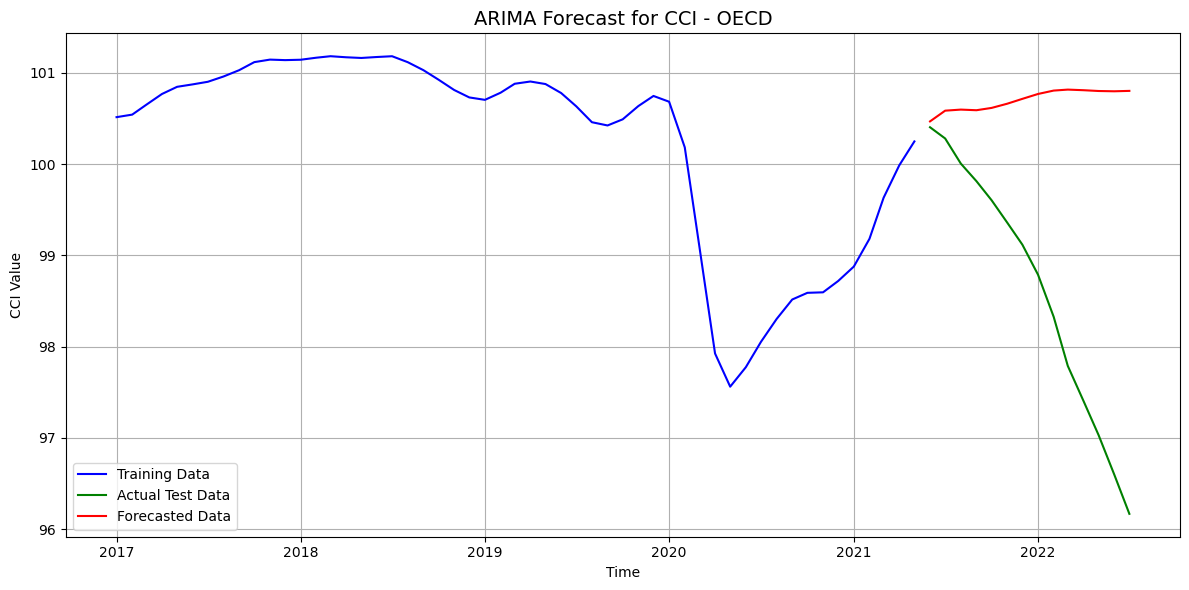

<Figure size 1200x800 with 0 Axes>

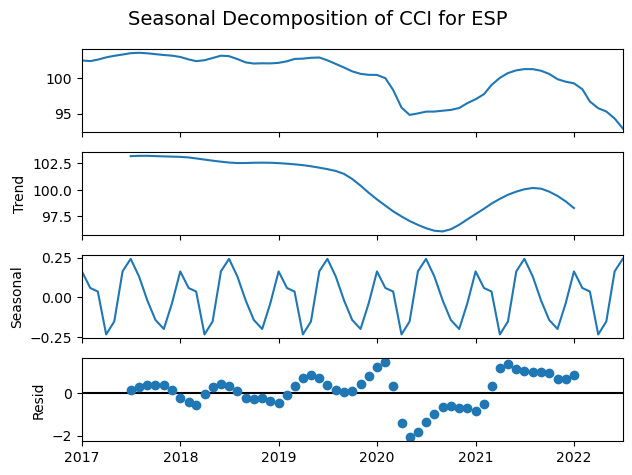

C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\AppData\Local\Temp\ipykernel_30396\3954689536.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Forecast'

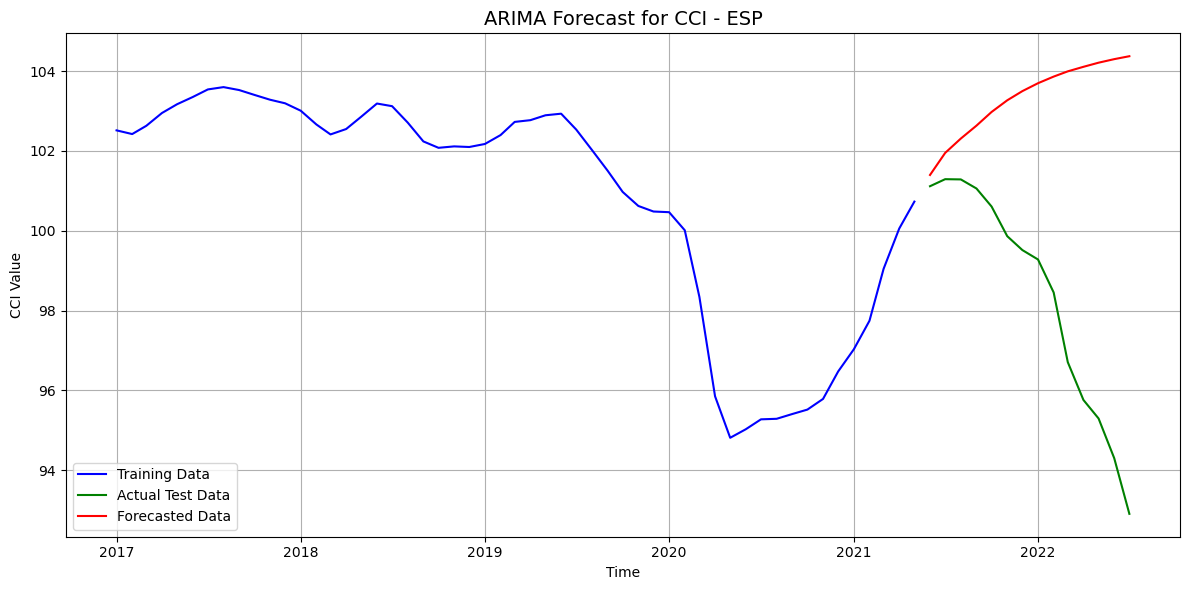

<Figure size 1200x800 with 0 Axes>

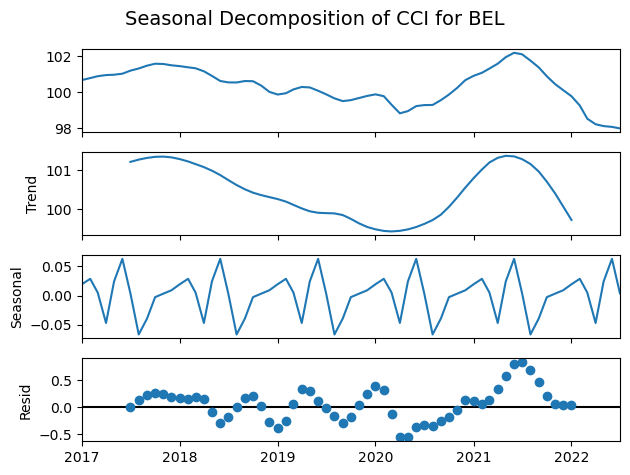

C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\AppData\Local\Temp\ipykernel_30396\3954689536.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Forecast'

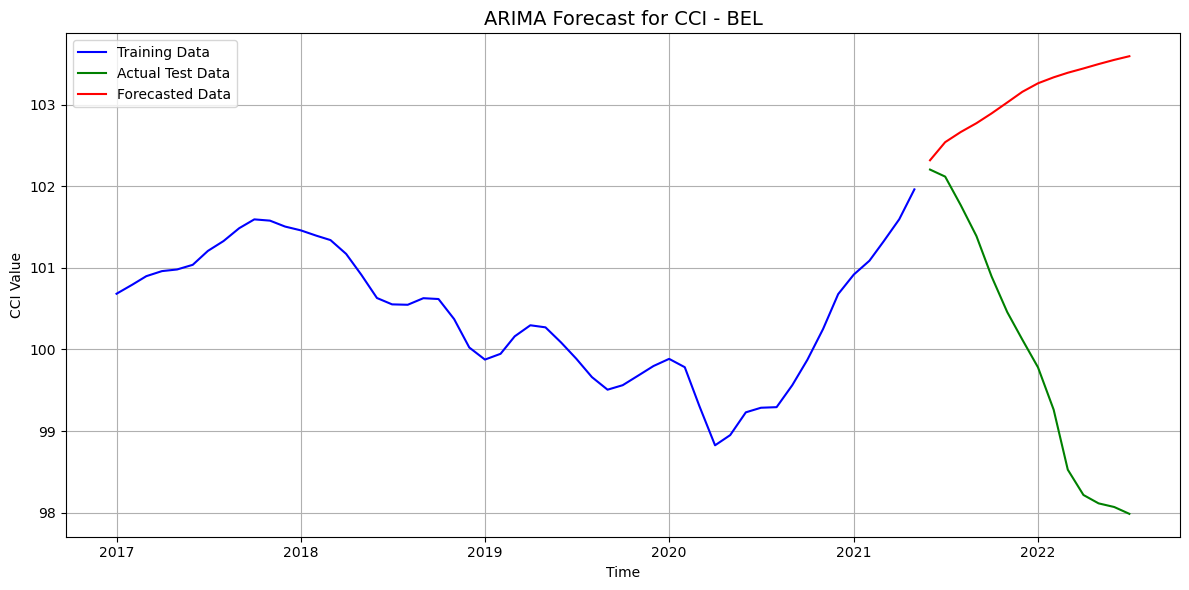

<Figure size 1200x800 with 0 Axes>

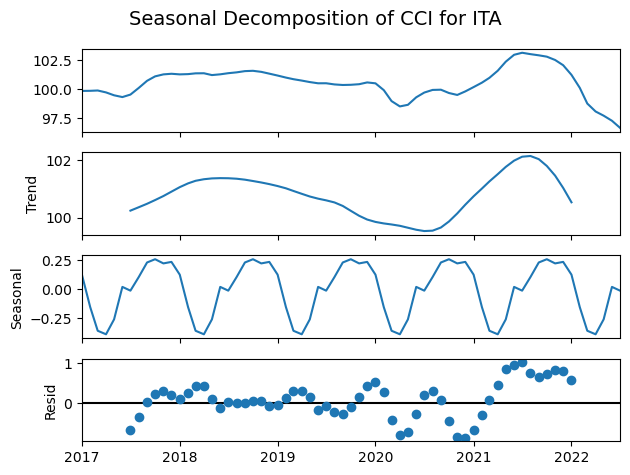

C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\AppData\Local\Temp\ipykernel_30396\3954689536.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Forecast'

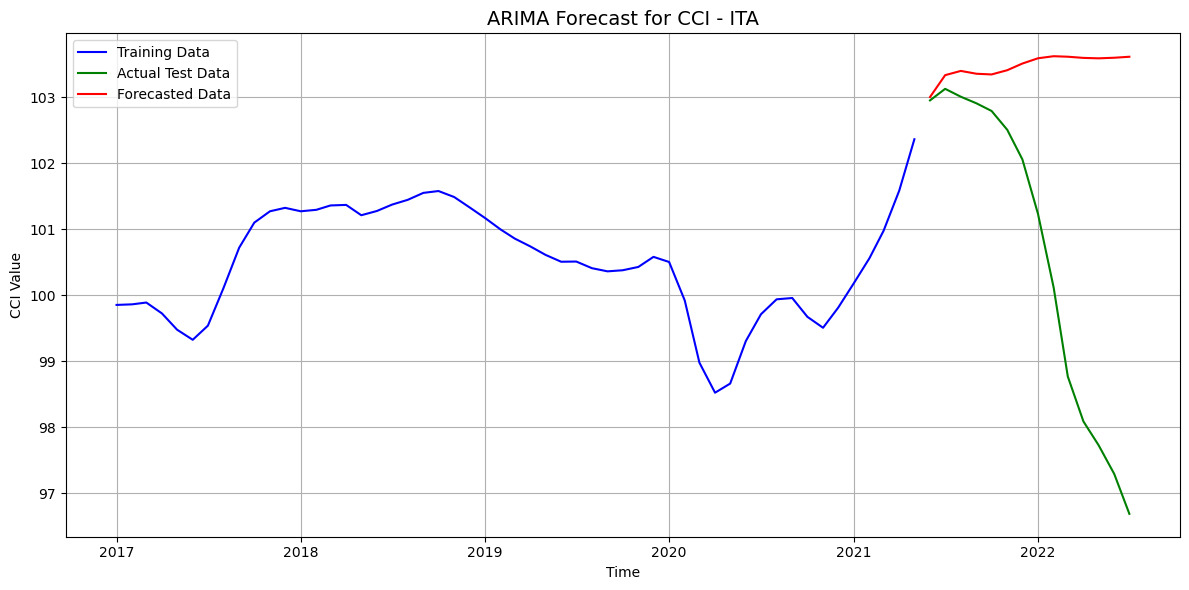

<Figure size 1200x800 with 0 Axes>

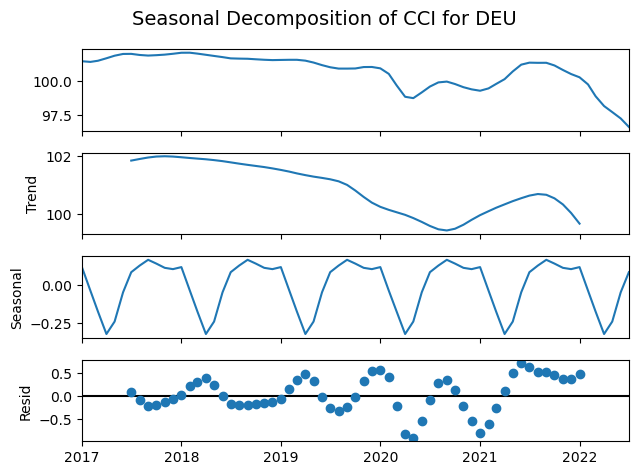

C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanja\AppData\Local\Temp\ipykernel_30396\3954689536.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Forecast'

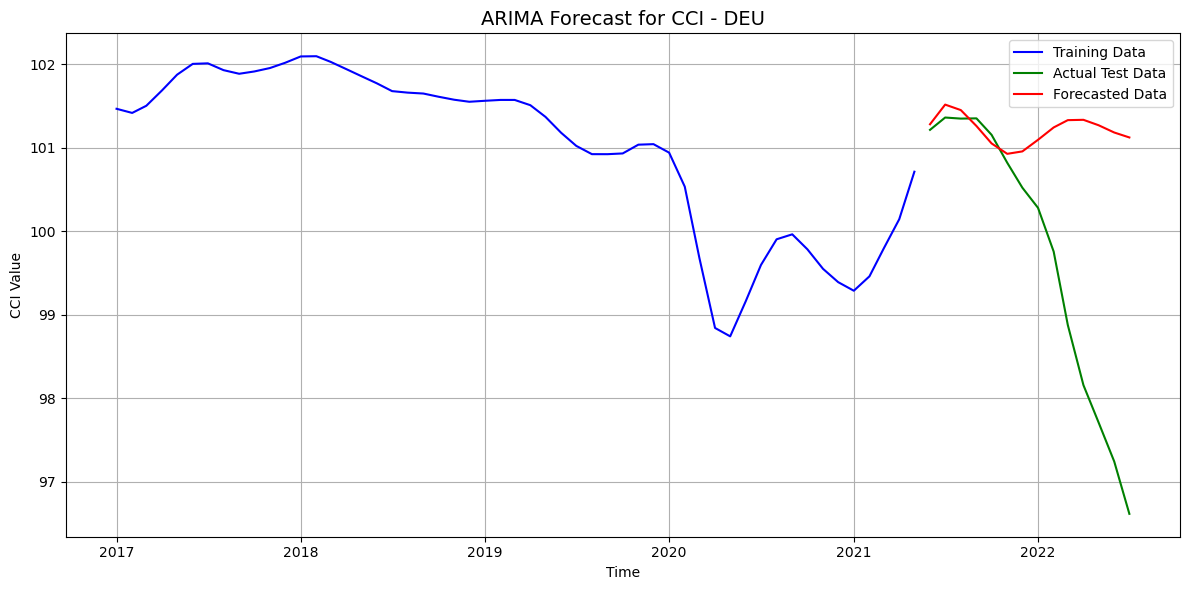

NameError: name 'tools' is not defined

In [31]:
# Performing decomposition and forecasting for all locations
forecast_results = {}
rmse_results = {}

for location in unique_locations:
    location_data = cci_data[cci_data['Location'] == location][['Time', 'Value']]
    location_data.set_index('Time', inplace=True)
    
    # Seasonal decomposition
    decomposition = seasonal_decompose(location_data, model='additive', period=12)
    
    # Plot decomposition
    plt.figure(figsize=(12, 8))
    decomposition.plot()
    plt.suptitle(f"Seasonal Decomposition of CCI for {location}", fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # ARIMA Forecasting
    # Splitting data
    train_size = int(len(location_data) * 0.8)
    train, test = location_data[:train_size], location_data[train_size:]
    
    # Fit ARIMA model
    try:
        model = ARIMA(train, order=(5, 1, 0))
        model_fit = model.fit()
        
        # Forecast
        forecast = model_fit.forecast(steps=len(test))
        test['Forecast'] = forecast
        
        # Store results
        forecast_results[location] = test
        
        # Plot observed vs forecast
        plt.figure(figsize=(12, 6))
        plt.plot(train.index, train['Value'], label='Training Data', color='blue')
        plt.plot(test.index, test['Value'], label='Actual Test Data', color='green')
        plt.plot(test.index, test['Forecast'], label='Forecasted Data', color='red')
        plt.title(f"ARIMA Forecast for CCI - {location}", fontsize=14)
        plt.xlabel("Time")
        plt.ylabel("CCI Value")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(test['Value'], test['Forecast']))
        rmse_results[location] = rmse
        
    except Exception as e:
        print(f"Forecasting failed for {location}: {e}")

# Display RMSE results for all locations
rmse_df = pd.DataFrame(list(rmse_results.items()), columns=['Location', 'RMSE'])
tools.display_dataframe_to_user(name="Forecast RMSE by Location", dataframe=rmse_df)